# Lending Club case study Exploratory Data Analysis

### Business objective

Lending Club company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extra - To Suppress warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv("loan.csv")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [4]:
df.shape

(39717, 111)

data set having 39717 rows and 111 columns

In [5]:
# display top5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

In [6]:
# Count the number of null values in each column, then sort in descending order
df.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit        39717
mo_sin_old_rev_tl_op              39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717
total_bc_limit                    39717
dti_joint                         39717


In [7]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the percentages in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

print(null_percentage_sorted[null_percentage_sorted > 0])

total_il_high_credit_limit        100.000000
mo_sin_old_rev_tl_op              100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6m                       100.000000
tot_cur_bal                       100.000000
tot_coll_a

There are many columns having 100% null values few columns having more than 30% null values.

In [8]:
threshold = 30

# Identify columns with more than 30% null values
columns_to_drop = null_percentage[null_percentage > threshold].index

print("Dropped columns:", columns_to_drop.tolist())

# Drop these columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Check the shape of the modified DataFrame and list dropped columns
print("Modified dataframe shape:", df.shape)

Dropped columns: ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percen

dropping columns which are having null values greater than 30%

In [9]:
# check columns having same value in all rows
columns_with_same_value = [col for col in df.columns if df[col].nunique() == 1]
print(columns_with_same_value)

# Drop these columns from the DataFrame
df.drop(columns=columns_with_same_value, inplace=True)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


the columns which are having same value in all rows does not have impact on loan status hence dropping it.

In [10]:
# Check the shape of the modified DataFrame and list dropped columns
print("Modified dataframe shape:", df.shape)

Modified dataframe shape: (39717, 44)


In [11]:
print("columns:", df.columns)

columns: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [12]:
print("id unique values: ", df["id"].nunique())
print("member_id unique values: ", df["member_id"].nunique())
# there are no duplicate rows

id unique values:  39717
member_id unique values:  39717


In [13]:
# from reaming 44 columns gone through descriptions and identify relvant columns
relevant_columns = ['loan_amnt', 'funded_amnt', 'term', 'int_rate',  'grade',
                    'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 
                    'verification_status','loan_status', 'purpose', 'addr_state', 'dti', 
                    'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec',
                    'revol_bal', 'revol_util','total_acc', 'last_credit_pull_d','pub_rec_bankruptcies']  

In [14]:
df = df[relevant_columns]

In [15]:
df.shape

(39717, 24)

In [16]:
# Count the number of null values in each column, then sort in descending order
df.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
last_credit_pull_d         2
loan_status                0
funded_amnt                0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
loan_amnt                  0
dtype: int64

### treat missing values

In [17]:
# treat missing values for emp_length
df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
df["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

#### using Annual income to impute employee experience


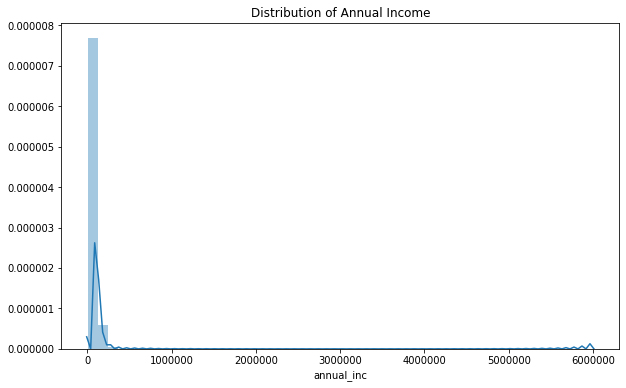

In [19]:
#Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.distplot(df['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

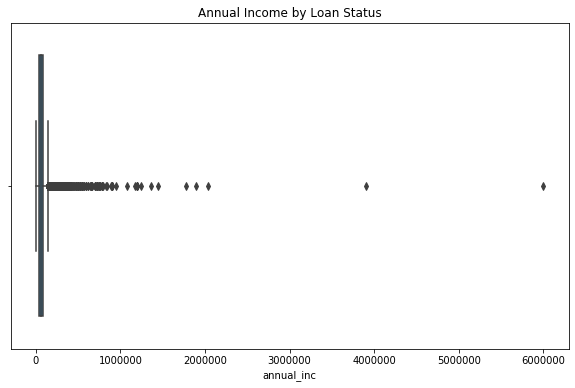

In [20]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df["annual_inc"])
plt.title('Annual Income by Loan Status')
plt.show()
# there are many outliers

There are many outliers. Remove them.

In [21]:
#check for outliers and remove them
#remove outliers in annual income
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

print("Annual Q1 :", Q1)
print("Annual Q3 :", Q3)

# Define the lower and upper bounds
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print("Annual income lower bound :", lower_bound)
print("Annual income upper bound :", upper_bound)

print("Original dataframe shape:", df.shape)
# Filter out the outliers
df = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

# Check the shape of the original and filtered dataframes

print("Filtered dataframe shape:", df.shape)

Annual Q1 : 40404.0
Annual Q3 : 82300.0
Annual income lower bound : 0
Annual income upper bound : 145144.0
Original dataframe shape: (39717, 24)
Filtered dataframe shape: (37874, 24)


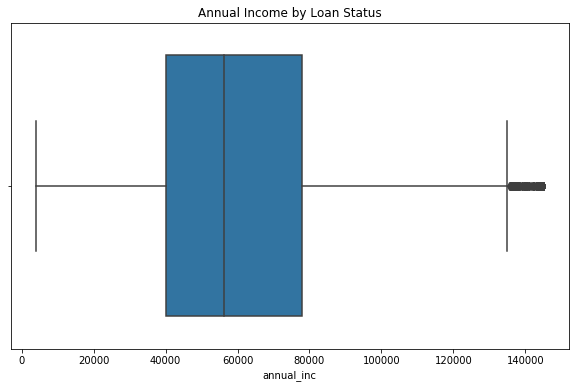

In [22]:
#box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df["annual_inc"])
plt.title('Annual Income by Loan Status')
plt.show()

In [23]:
print(df['emp_length'].isnull().sum())

# Calculate median annual income for each experience category
median_annual_inc = df.groupby('emp_length')['annual_inc'].median()

# Define a function to impute experience based on median annual income
def impute_experience(row):
    if pd.isnull(row['emp_length']):
        closest_experience = (median_annual_inc - row['annual_inc']).abs().idxmin()
        return closest_experience
    return row['emp_length']

# Apply the function to the DataFrame
df['emp_length'] = df.apply(impute_experience, axis=1)
print("\nMissing values after imputation:")
print(df['emp_length'].isnull().sum())

1057

Missing values after imputation:
0


In [24]:
df['emp_length'].isnull().sum()

0

In [25]:
# Count the number of null values in each column, then sort in descending order
null_col = df.isnull().sum().sort_values(ascending=False)
print(null_col[null_col > 0])

pub_rec_bankruptcies    661
revol_util               49
last_credit_pull_d        2
dtype: int64


### impute missing pub_rec_bankruptcies with mode

In [26]:
df['pub_rec_bankruptcies'].value_counts()

0.0    35570
1.0     1637
2.0        6
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
pub_rec_bankruptcies_mode_value = df['pub_rec_bankruptcies'].mode()[0]
print(pub_rec_bankruptcies_mode_value)

0.0


In [28]:
#impute missing pub_rec_bankruptcies with mode value
df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode_value, inplace=True)

In [29]:
# Count the number of null values in each column, then sort in descending order
null_col = df.isnull().sum().sort_values(ascending=False)
print(null_col[null_col > 0])

revol_util            49
last_credit_pull_d     2
dtype: int64


In [30]:
df['revol_util'].value_counts()

0%        914
0.20%      61
63%        61
66.70%     58
46.40%     57
         ... 
26.32%      1
11.63%      1
21.92%      1
49.63%      1
62.31%      1
Name: revol_util, Length: 1083, dtype: int64

### impute revol_util with its max value

In [31]:
df['revol_util'].fillna("0%", inplace=True)

In [32]:
df['revol_util'].isnull().sum()

0

In [33]:
df['revol_util'].dtype

dtype('O')

In [34]:
# cleanup, for revol_util  remove % and convert to float
df['revol_util'] = df['revol_util'].str.replace('%', '').astype('float64')

In [35]:
# Count the number of null values in each column, then sort in descending order
null_col = df.isnull().sum().sort_values(ascending=False)
print(null_col[null_col > 0])

last_credit_pull_d    2
dtype: int64


### Remove rows with null values in 'last_credit_pull_d' column

In [36]:
df_cleaned = df.dropna(subset=['last_credit_pull_d'])

In [37]:
# Count the number of null values in each column, then sort in descending order
null_col = df_cleaned.isnull().sum().sort_values(ascending=False)
print(null_col[null_col > 0])

Series([], dtype: int64)


there are no null values.

In [38]:
df_cleaned.shape

(37872, 24)

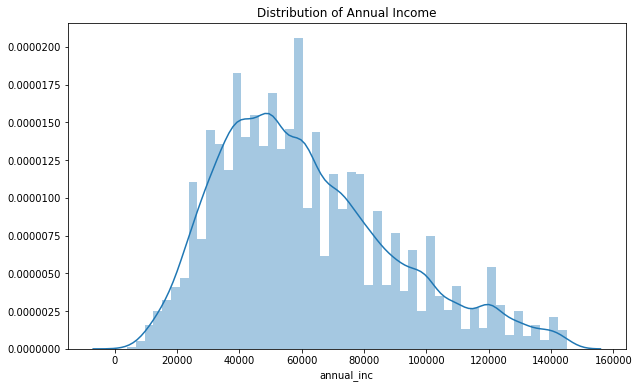

In [39]:
#Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.distplot(df_cleaned['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

### Add new columns annual_inc_bucket, int_rate_bucket, dti_bucket

In [40]:
# Define the bins for annual income
print("annual_inc min value :", df_cleaned['annual_inc'].min())
print("annual_inc max value :", df_cleaned['annual_inc'].max())
bins = [4000, 20000, 40000, 60000, 80000, 100000, 120000, 145008]
labels = ['4000-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000', '120000-145008']

# Create the new column with annual income buckets
df_cleaned['annual_inc_bucket'] = pd.cut(df_cleaned['annual_inc'], bins=bins, labels=labels, include_lowest=True)

annual_inc min value : 4000.0
annual_inc max value : 145008.0


In [41]:
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '').astype('float64')

print("int_rate min value :", df_cleaned['int_rate'].min())
print("int_rate max value :", df_cleaned['int_rate'].max())

# Define the bins for interest rate
bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Create the new column with interest rate buckets
df_cleaned['int_rate_bucket'] = pd.cut(df_cleaned['int_rate'], bins=bins, labels=labels, include_lowest=True)

int_rate min value : 5.42
int_rate max value : 24.4


In [42]:
# Define the bins for DTI

print("dti min value :", df_cleaned['dti'].min())
print("dti max value :", df_cleaned['dti'].max())

bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

# Create the new column with DTI buckets
df_cleaned['dti_bucket'] = pd.cut(df_cleaned['dti'], bins=bins, labels=labels, include_lowest=True)

dti min value : 0.0
dti max value : 29.99


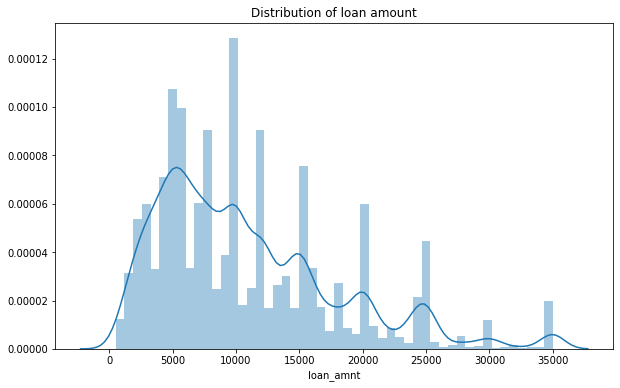

In [43]:
#Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.distplot(df_cleaned['loan_amnt'], kde=True)
plt.title('Distribution of loan amount')
plt.show()

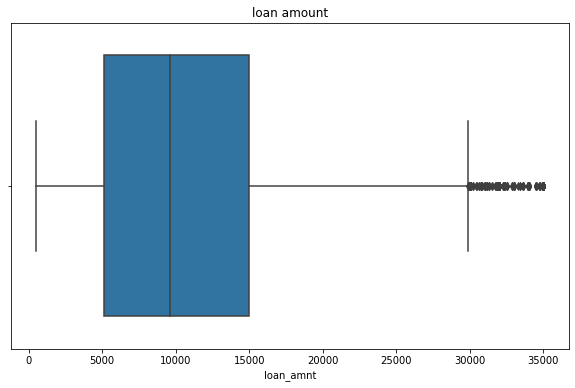

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(df["loan_amnt"])
plt.title('loan amount')
plt.show()

In [45]:
df_cleaned['loan_amnt'].head()

0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amnt, dtype: int64

In [46]:
df_cleaned['loan_to_income_ratio'] = (df_cleaned['loan_amnt']/ df_cleaned['annual_inc']).round(2)

In [47]:
df_cleaned['loan_to_income_ratio'].head()

0    0.21
1    0.08
2    0.20
3    0.20
4    0.04
Name: loan_to_income_ratio, dtype: float64

In [48]:
df_cleaned['loan_to_income_ratio'].min()

0.01

In [49]:
df_cleaned['loan_to_income_ratio'].max()

0.83

In [50]:
#loan amountvs annual income ratio
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

# Create the new column with DTI buckets
df_cleaned['loan_to_income_ratio_bucket'] = pd.cut(df_cleaned['loan_to_income_ratio'], bins=bins, labels=labels, include_lowest=True)

In [51]:
df_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'annual_inc_bucket', 'int_rate_bucket',
       'dti_bucket', 'loan_to_income_ratio', 'loan_to_income_ratio_bucket'],
      dtype='object')

In [52]:
df_cleaned["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

convert emp_length to 0-10 as pergiven guidelines

In [53]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [54]:
df_cleaned = df_cleaned.replace({"emp_length": emp_length_dict })

In [55]:
print(df_cleaned["emp_length"].unique())

[10  0  1  3  8  9  4  5  6  2  7]


In [56]:
df_cleaned["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [57]:
df_cleaned = df_cleaned[df_cleaned["loan_status"] != "Current"]
#consider only loan_status  "fully paid" and 'Charged Off' for analysis, ignore "current" ones

### Univariate Analysis

In [58]:
# univariate analysis: shows count for respective columns
def display_countplot(cat_cols, dataframe) :
    for col in cat_cols :
        sns.countplot(x= dataframe[col])
        plt.xticks(rotation=45)
        plt.show()

In [59]:
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc_bucket', 'verification_status',
           'loan_status', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 
            'annual_inc_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_to_income_ratio_bucket']

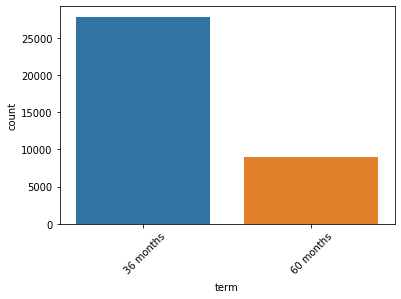

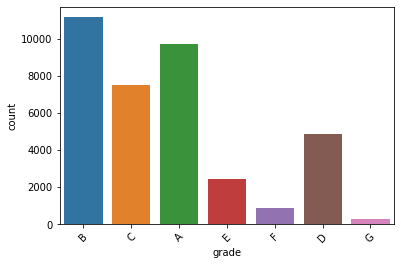

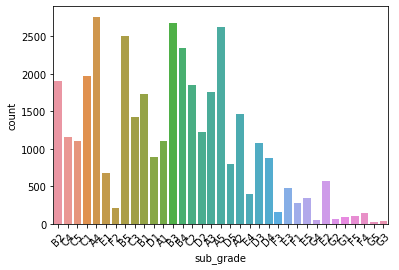

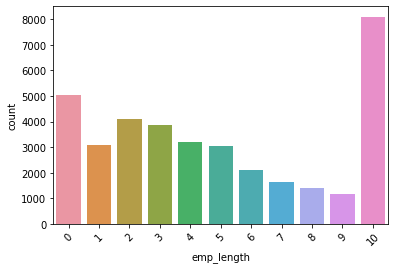

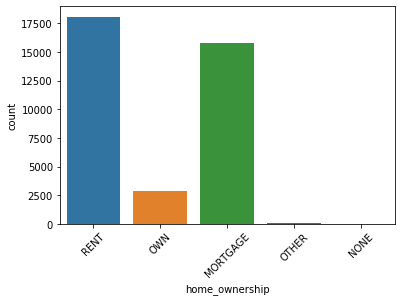

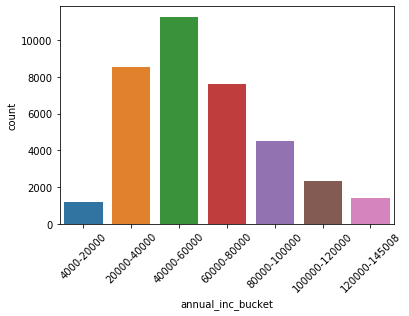

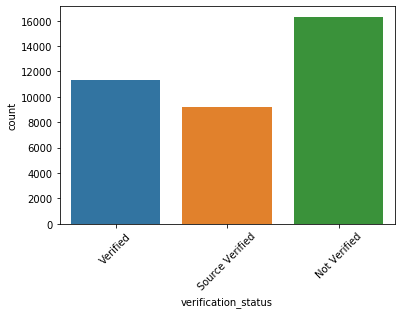

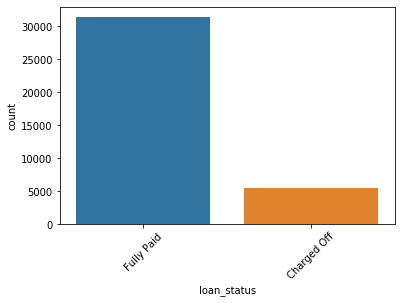

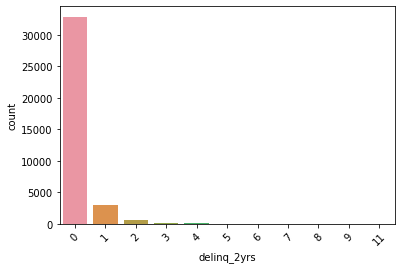

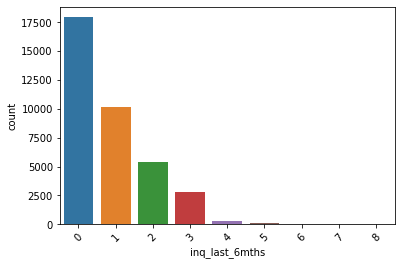

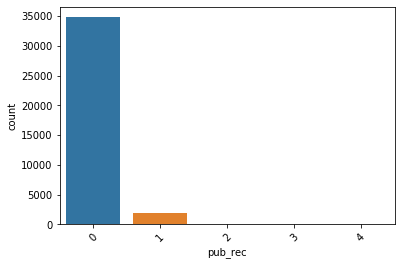

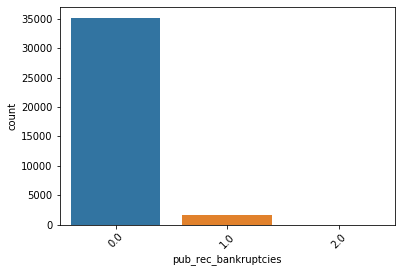

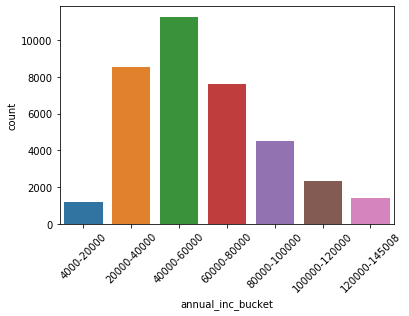

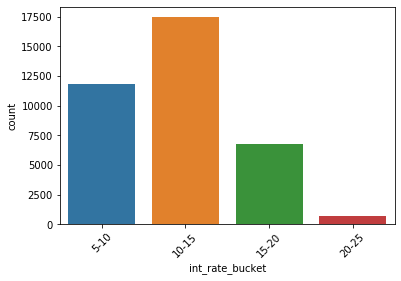

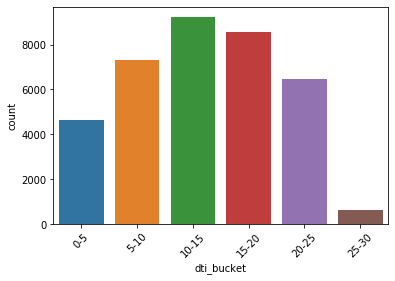

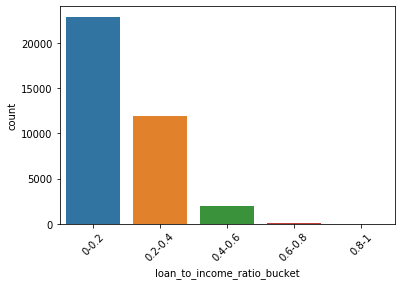

In [60]:
display_countplot(cat_cols, df_cleaned)

In [61]:
# only for loan_staus 'Charged Off'
df_cleaned_defaulter = df_cleaned[df_cleaned["loan_status"] == 'Charged Off']

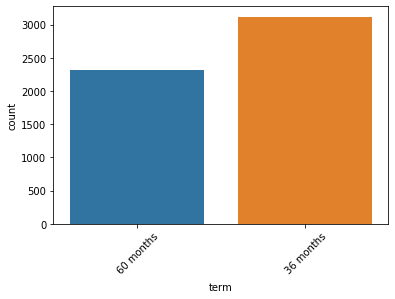

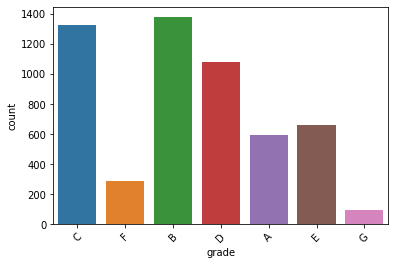

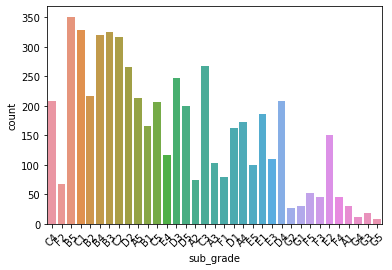

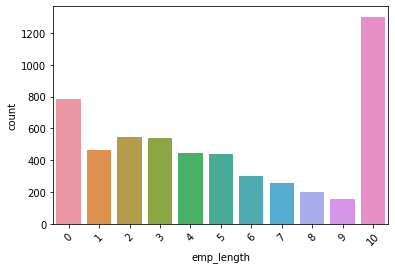

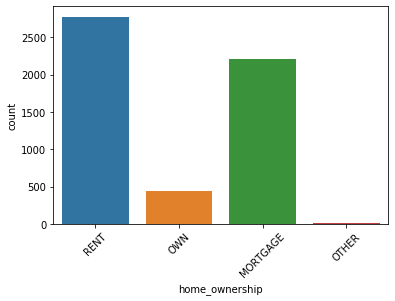

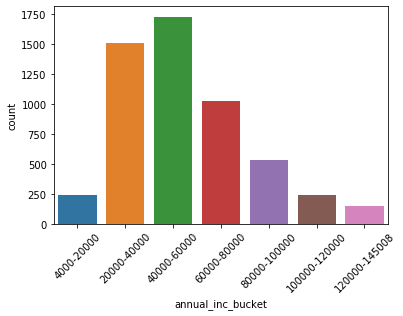

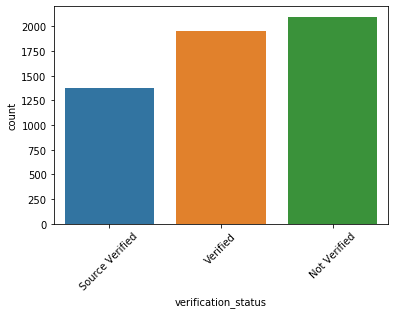

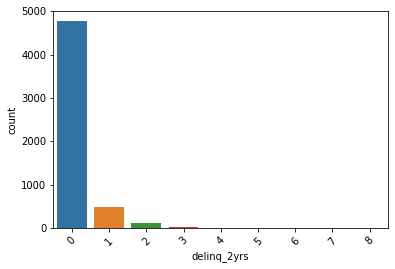

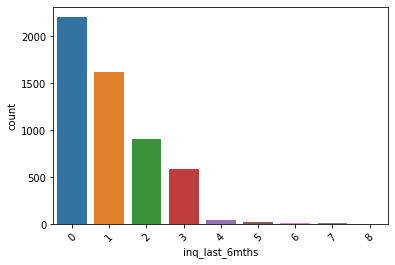

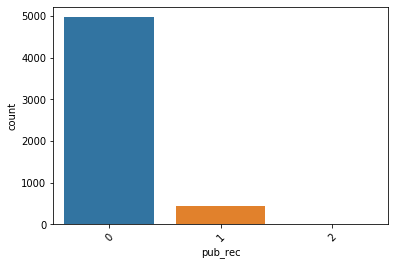

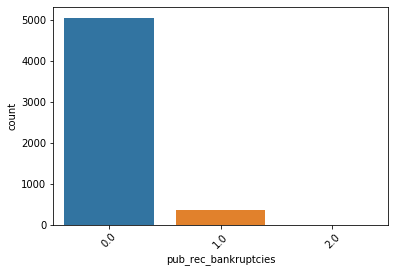

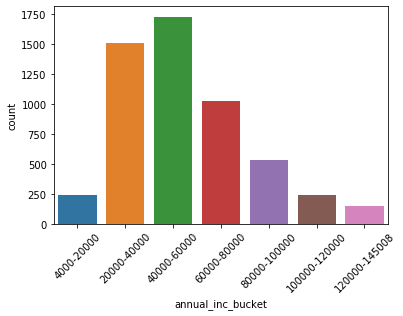

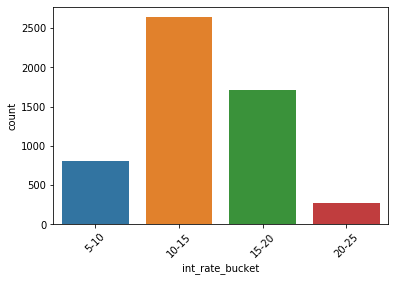

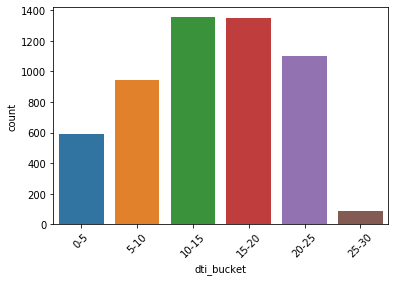

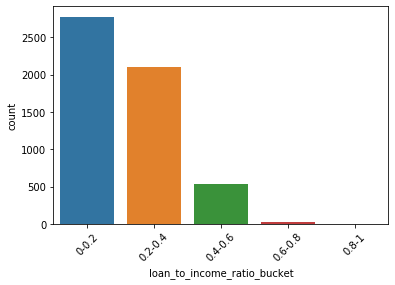

In [62]:
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc_bucket', 'verification_status',
            'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies',
            'annual_inc_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_to_income_ratio_bucket']
display_countplot(cat_cols, df_cleaned_defaulter)

### Bivariate Analysis

In [63]:
# Loan status vs columns
def display_cat_vs_loanstatus(columns, dataframe) :
    for col in columns :
        sns.countplot(x = col, hue ='loan_status', data = dataframe)
        plt.title('Loan Status')
        plt.xticks(rotation=45)
        plt.show()

In [64]:
columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc_bucket', 'verification_status',
           'loan_status', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies',
           'annual_inc_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_to_income_ratio_bucket']

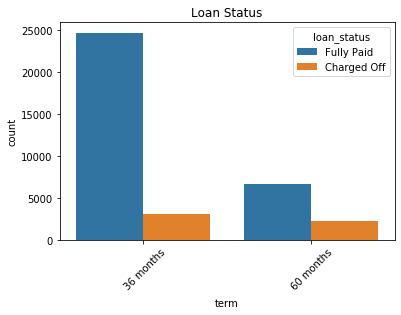

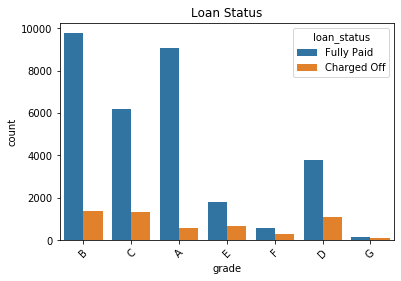

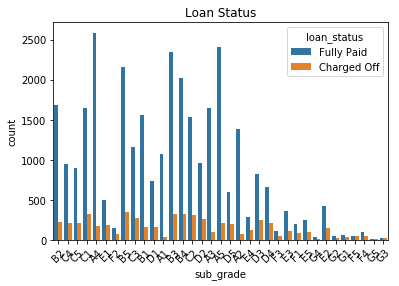

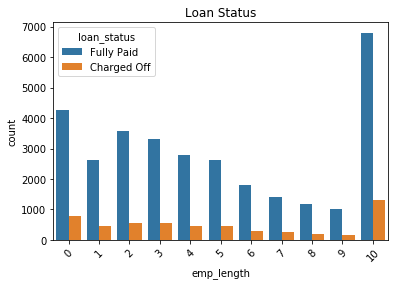

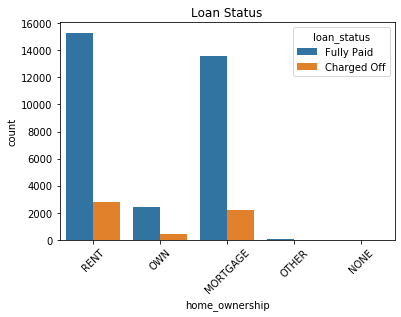

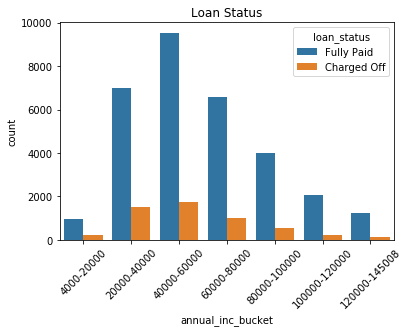

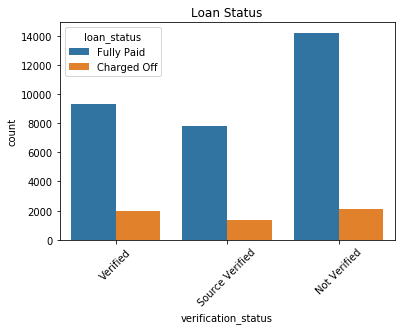

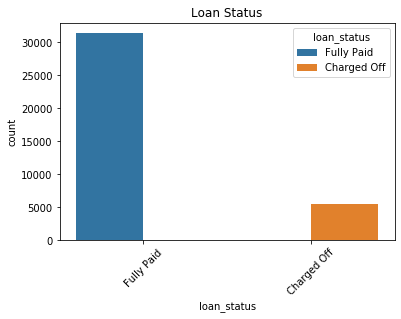

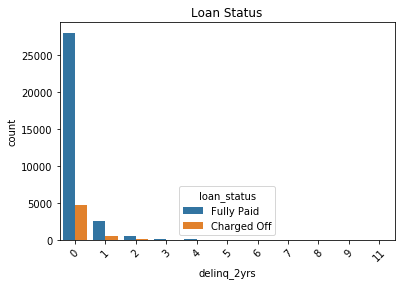

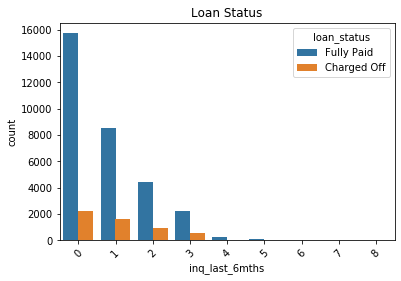

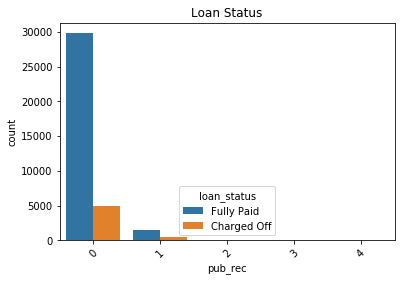

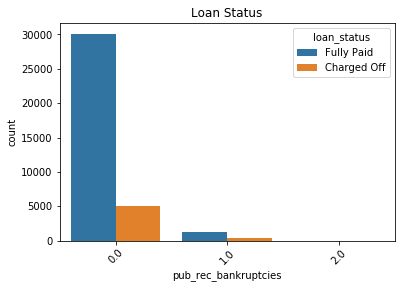

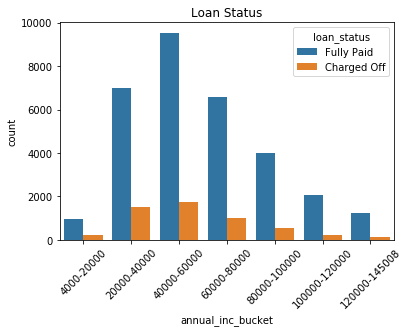

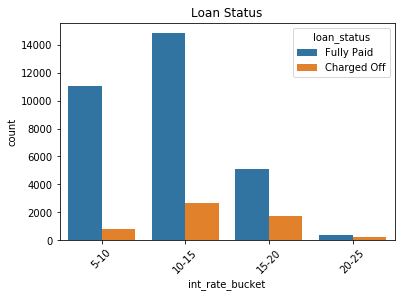

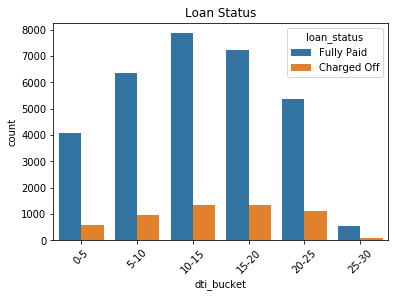

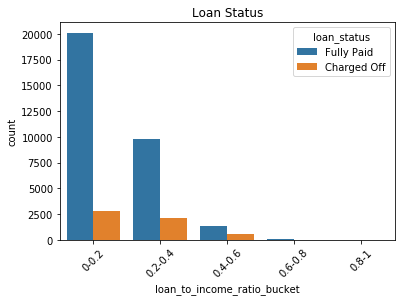

In [65]:
display_cat_vs_loanstatus(columns, df_cleaned)

### univariate segment

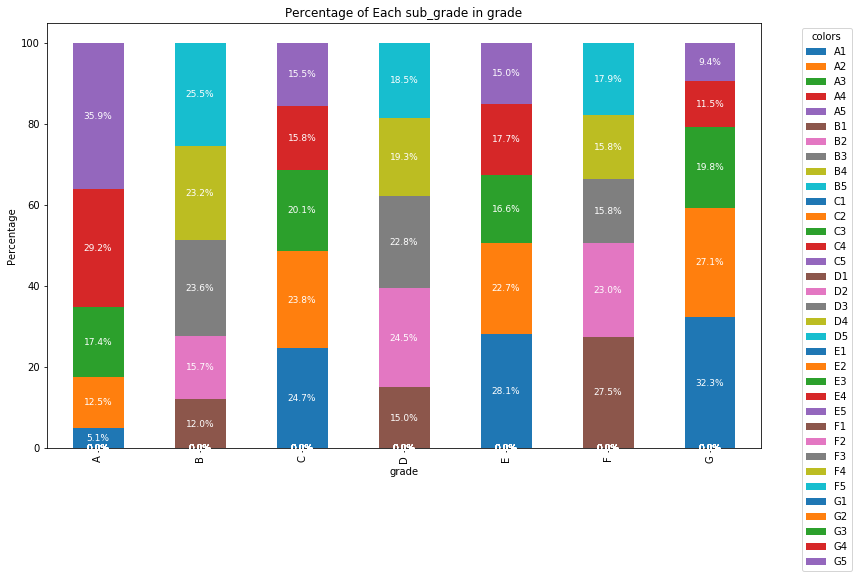

In [66]:
#only for defaulter data
# Group by grade and sub_grade, then count occurrences
grouped = df_cleaned_defaulter.groupby(['grade', 'sub_grade']).size().unstack(fill_value=0)

# Calculate the percentage for each subgrade within each grade
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the percentages
ax = percentages.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add percentage labels to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')
    
# Add title and labels
plt.title('Percentage of Each sub_grade in grade')
plt.xlabel('grade')
plt.ylabel('Percentage')
plt.legend(title='colors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
# Get continuous variable column names
continuous_cols = [col for col in df_cleaned.columns if pd.api.types.is_numeric_dtype(df_cleaned[col])]
print(continuous_cols)

['loan_amnt', 'funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'loan_to_income_ratio']


In [68]:
continous_var_columns = ['annual_inc', 'int_rate', 'dti']

In [69]:
def continousVar_vs_loanstatus_plot(continous_var_columns):
    for col in continous_var_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x ='loan_status', y = col, data = df_cleaned)
        plt.title(col + ' by Loan Status')
        plt.xlabel('Loan Status')
        plt.ylabel(col)
        plt.show()

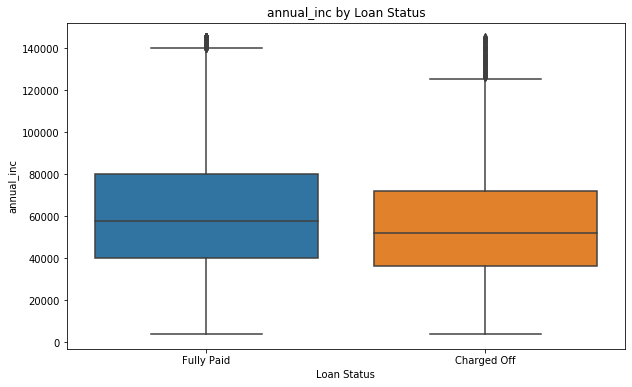

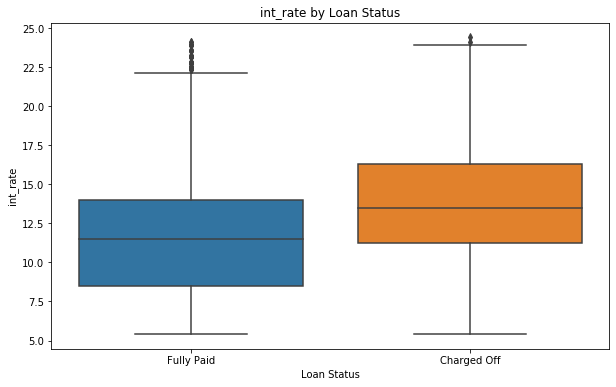

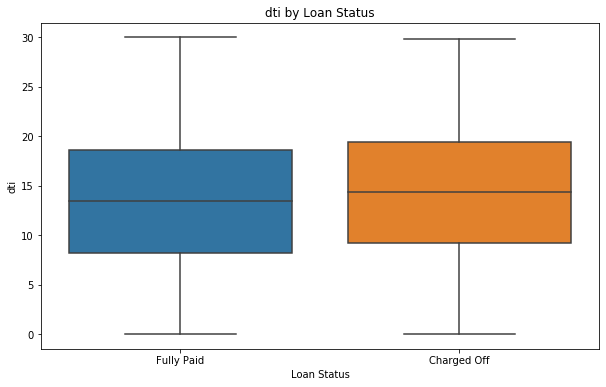

In [70]:
continousVar_vs_loanstatus_plot(continous_var_columns)

In [71]:
term_loan_status_crosstab = pd.crosstab(df_cleaned['term'], df_cleaned['loan_status'])
print(term_loan_status_crosstab)

loan_status  Charged Off  Fully Paid
term                                
 36 months          3119       24717
 60 months          2311        6668


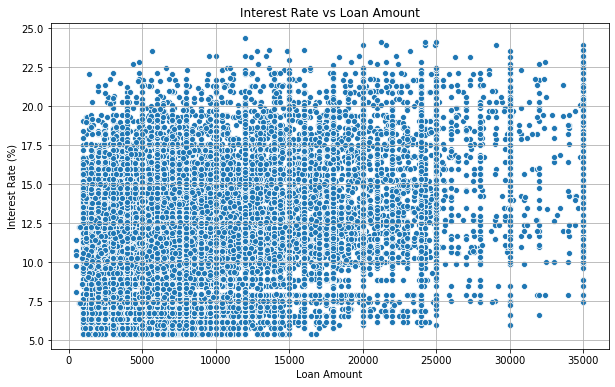

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=df_cleaned)
plt.title('Interest Rate vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

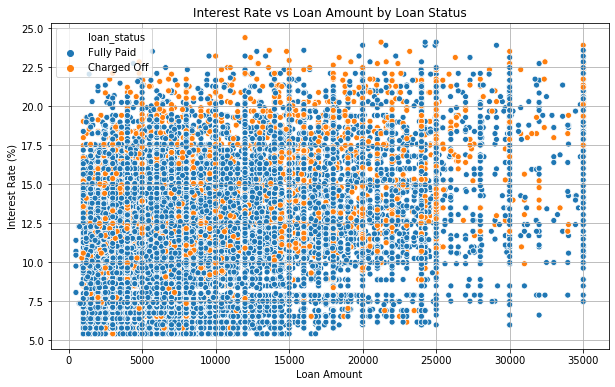

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=df_cleaned)
plt.title('Interest Rate vs Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

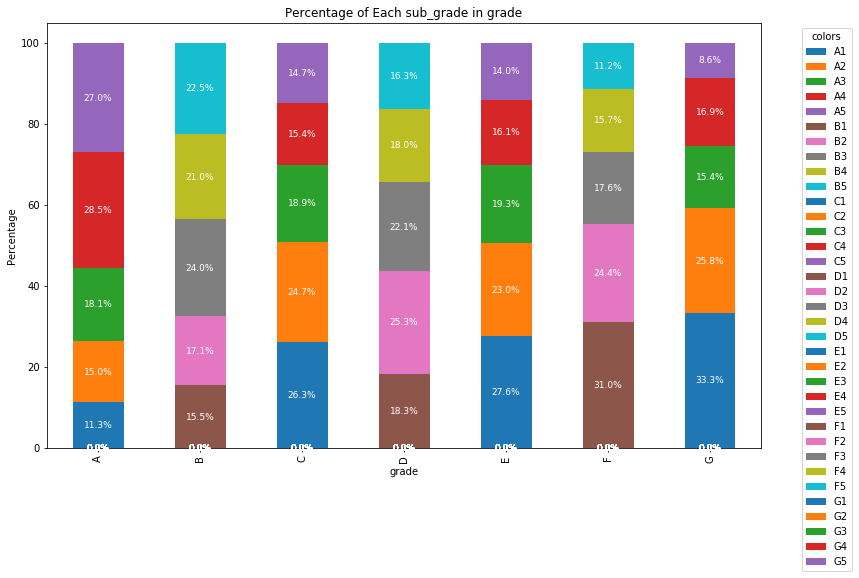

In [78]:
# Group by grade and sub_grade, then count occurrences
grouped = df_cleaned.groupby(['grade', 'sub_grade']).size().unstack(fill_value=0)

# Calculate the percentage for each subgrade within each grade
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the percentages
ax = percentages.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add percentage labels to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')

# Add title and labels
plt.title('Percentage of Each sub_grade in grade')
plt.xlabel('grade')
plt.ylabel('Percentage')
plt.legend(title='colors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

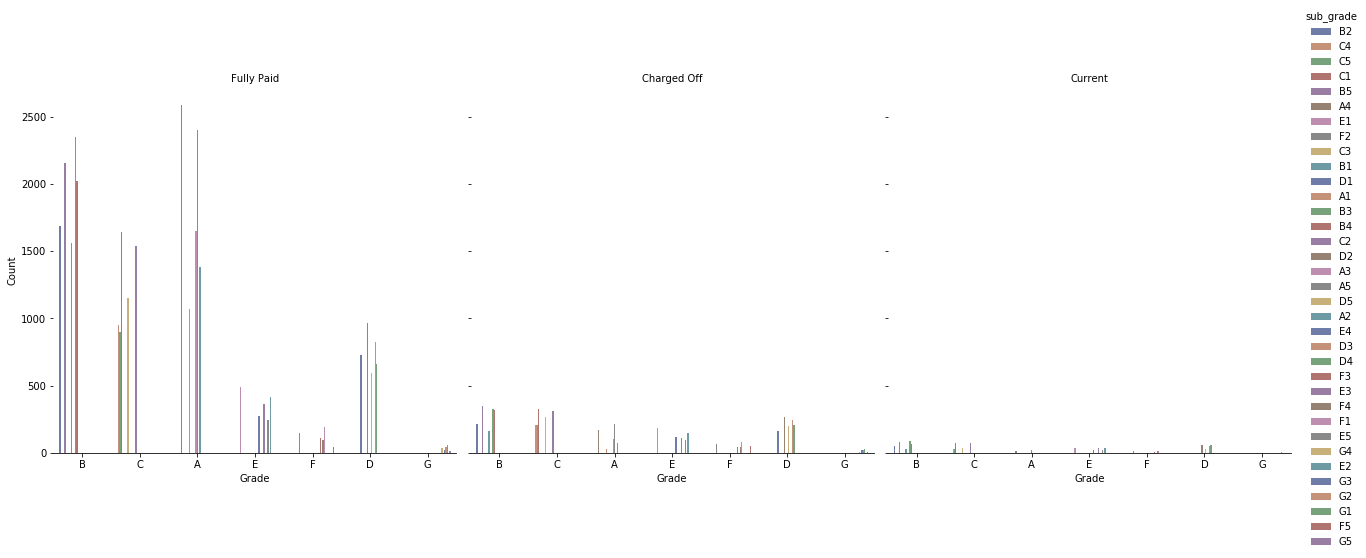

In [79]:
# grade, subgrade, loan_status
g = sns.catplot(
    data=df, kind="count",
    x="grade", hue="sub_grade", col="loan_status",
    palette="dark", alpha=.6, height=6,
    aspect=1
)
g.set_axis_labels("Grade", "Count")
g.set_titles("{col_name}")
g.despine(left=True)
plt.show()